In [1]:
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
from vision import WIDTH, TargetDetector, TargetDetectorMobileNet
from board import Board
from motor_controller import Direction, MotorController
import time
from typing import Optional, Tuple
from timer import timer

In [ ]:
@timer
def get_target(detector: TargetDetector) -> Optional[Tuple[int, int]]:
    target = None
    counter = 0
    while (not target) and (counter < 5):
        time.sleep(0.05)
        target = detector.get_target()
        counter += 1
    return target

In [ ]:
def _get_direction(target: int, width: int = WIDTH, side_ratio: float = 0.33) -> Direction:
    if target < side_ratio * width:
        return Direction.LEFT
    elif target > (1 - side_ratio) * width:
        return Direction.RIGHT
    else:
        return Direction.FORWARD

def get_direction(target: int, last_direction: Optional[Direction], width: int = WIDTH, side_ratio: float = 0.25) -> Direction:
    direction = _get_direction(target, width, side_ratio)
    if direction == last_direction and direction in (Direction.LEFT, Direction.RIGHT):
        return Direction.NONE
    return direction

In [ ]:
def get_turn_duration(target: int, width: int = WIDTH, side_ratio: float = 0.33, min_duration: float = 0.25, max_duration: float = 0.5) -> float:
    if target < side_ratio * width:
        return (1 - (target / (side_ratio * width))) * (max_duration - min_duration) + min_duration
    elif target > (1 - side_ratio) * width:
        return ((target - (1 - side_ratio) * width) / (side_ratio * width)) * (max_duration - min_duration) + min_duration
    else:
        # forward: 2 * max
        return 2 * max_duration
    

In [ ]:
board.stop()

In [ ]:
target_detector = TargetDetectorMobileNet(confidence=0.5)
board = Board()
motor_controller = MotorController(board)

logger = logging.getLogger('Driving')

try:
    target_detector.start()
    motor_controller.start()

    direction = None
    for i in range(500):
        target = target_detector.get_target()
        if target:
            x, _ = target
            direction = get_direction(x, direction, WIDTH)
            duration = get_turn_duration(x, WIDTH)
            logger.info('Target found: %s %s, %s', target, direction, duration)
            motor_controller.send_direction(direction, duration)
        time.sleep(0.05)

finally:
    motor_controller.stop()
    target_detector.stop()

In [3]:
board = Board()

In [8]:
def get_distance():
    sum = 0.0
    for _ in range(5):
        sum += board.get_sonic_distance()
    return sum / 5

In [45]:
import numpy as np

def get_distance_ahead():
    distances = []
    #for angle in range(45, 136, 1):
    for angle in range(75, 105, 1):
        board.set_servo_angle(board.CMD_SERVO1, angle)
        distance = get_distance()
        if (distance > 0 and distance < 100):
            distances.append((angle, distance))
    coordinates = np.array([ [ np.cos(np.radians(angle)) * distance, np.sin(np.radians(angle)) * distance ] for (angle, distance) in distances ])
    return np.median(coordinates[:, 1]), coordinates

Distance ahead: 51.69078636795382
Distance ahead: 51.24693446685289
Distance ahead: 51.86677413617465
Distance ahead: 51.94418480601764
Distance ahead: 52.056040405191496
Distance ahead: 51.55041527525799
Distance ahead: 51.76481163243993
Distance ahead: 51.78758861269059
Distance ahead: 52.24380282852658
Distance ahead: 59.80376698009222
Distance ahead: 52.01316993440134
Distance ahead: 52.01316993440134
Distance ahead: 61.16789346976411
Distance ahead: 46.80469046776725
Distance ahead: 61.91564326167604
Distance ahead: 42.88573339119487
Distance ahead: 64.34780499382887
Distance ahead: 55.679208108074526
Distance ahead: 74.08528915740928
Distance ahead: 59.194600000632846
Distance ahead: 84.0375535458515
Distance ahead: 48.91228608221769
Distance ahead: 66.74146088320134
Distance ahead: 57.56051691274841
Distance ahead: 88.67192220331788
Distance ahead: 53.59015407896729
Distance ahead: 64.82073811237868
Distance ahead: 42.86059346260241
Distance ahead: 29.538055613293952
Distance ah

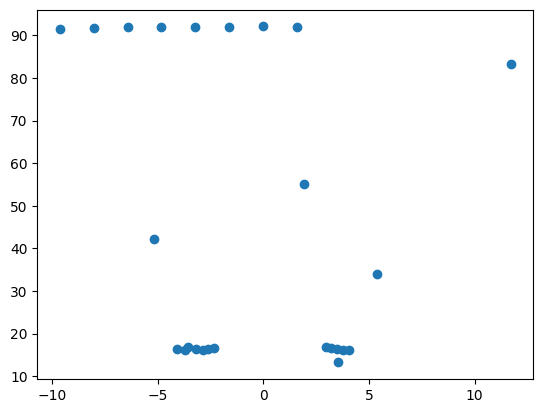

In [47]:
import numpy as np
import matplotlib.pyplot as plt

for _ in range(100):
    distance, coordinates = get_distance_ahead()
    print('Distance ahead:', distance)

plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.show()